# Algebraic differentiators: A detailed introduction
This notebook includes a detailed introduction into the theoretical background of algebraic differentiators and shows how to use the proposed implementation.
## Content of this notebook
\textbf{Theoretical background}: Time-domain and frequency-domain analysis


\textbf{Numerical differentiation of sample signals}: The numerical estimation of derivatives of simulation and experimental data. 
## Theoretical background
### Time-domain analysis

The algebraic derivative estimation methods  were initially derived using differential algebraic manipulations of truncated Taylor series \cite{mboup2007b,mboup2009a}. Later works \cite{liu2011a,kiltz2017} derived these filters using an approximation theoretical approach that yields a straightforward analysis of the filter characteristics, especially the estimation delay. Using this approach, the estimate of the $n$-th order derivative of a signal ${t\mapsto y(t)}$ denoted $\hat{y}^{(n)}$ can be approximated as
\begin{equation}
\hat{{y}}^{(n)}(t)=\int_{0}^{T}g^{(n)}_T(\tau)y(t-\tau)\textrm{d}\tau,
\end{equation}
with the filter kernel
\begin{equation}
g(t)=\frac{2}{T}\sum_{i=0}^{N}\frac{P_i^{(\alpha,\beta)}(\vartheta)}{\big\lVert{P_i^{(\alpha,\beta)}\big\rVert}^2}w^{(\alpha,\beta)}\left(\nu(t)\right)P_i^{(\alpha,\beta)}\left(\nu(t)\right).
\end{equation}
In the latter equation $\nu(t)=1-\frac{2}{T}t$, $\big\lVert{x}\big\rVert=\sqrt{\langle x,x\rangle}$ is the norm induced by the inner product
    \begin{equation}
        \langle x,y\rangle=\int_{-1}^{1}w^{(\alpha,\beta)}(\tau)x(\tau){y(\tau)}\textrm{d}\tau,
    \end{equation}
    with the weight function
    \begin{equation}
        w^{(\alpha,\beta)}(\tau)=\begin{cases}
        (1-\tau)^\alpha(1+\tau)^\beta,&\quad\tau\in[-1,1],\\
        0,&\quad\text{otherwise},
        \end{cases}
    \end{equation}
    $N$ is the degree of the polynomial approximating the signal $y^{(n)}$ in the time window $[t-T,t]$, $T$ is the filter window length, and $\vartheta$ parameterizes the estimation delay as described below.



 This approach yields a straightforward analysis of the estimation delay $\delta_t$ and the degree of exactness $\gamma$. The degree of exactness was introduced in \cite{kiltz2017} as the polynomial degree up to which the derivative estimation is exact. If $\gamma=2$ for example, the first and second time derivatives of a polynomial signal of degree two are exact up to an estimation delay.  The delay and the degree of exactness  are given as
\begin{align}
\gamma&=\left\{\begin{matrix}
n+N+1,\quad &\text{if } N=0\vee\vartheta=p_{N+1,k}^{(\alpha,\beta)}\\[4pt]
n+N,\quad&\text{otherwise,}
\end{matrix}\right.\\
\delta_t&=\left\{\begin{matrix}
\frac{\alpha+1}{\alpha+\beta+2}T,\quad&\text{if } N=0\\[4pt]
\frac{1-\vartheta}{2}T,\quad&\text{otherwise,}
\end{matrix}\right.
\end{align} 
with $p_{N+1,k}^{(\alpha,\beta)}$ the $k$-th zero of the Jacobi polynomial of degree $N+1$.

#### Initializing an algebraic differentiator and performing a time-domain analysis

The parameter $\vartheta$ is initialized by default as the largest zero of the Jacobi polynomial of degree $N+1$. This can be changed using the appropriate class member function (see documentation). 

In [1]:
%matplotlib widget
import matplotlib.pyplot as plt
import sys
sys.path.append("..")
from algebraicDifferentiator import AlgebraicDifferentiator
import numpy as np
ts = 0.001

# Initialize two different differentiators: For the first one the window length is specified
# while the cutoff frequency is specified for the second
diffA = AlgebraicDifferentiator(N=0,alpha=4.,beta=4,T=0.1, ts=ts)
diffB = AlgebraicDifferentiator(N=1,alpha=4.,beta=4.,T=None,wc = 100, ts=ts)

The differentiator has the parameters:
Alpha: 4.000000
Beta: 4.000000
Window length in s: 0.100000
Polynomial degree: 0
Estimation delay in s: 0.050000
Cutoff Frequency: 68.534675
Discrete window length: 100
The differentiator has the parameters:
Alpha: 4.000000
Beta: 4.000000
Window length in s: 0.091000
Polynomial degree: 1
Estimation delay in s: 0.031781
Cutoff Frequency: 100.901547
Discrete window length: 91


In [2]:
# Plot the impulse and step response of the filter
t = np.arange(0,0.2,ts/10)
n = 1
gA = diffA.evalKernelDer(t,n)
gB = diffB.evalKernelDer(t,n)
fig, ax = plt.subplots(nrows=1, ncols=2,sharex=True, figsize=(10, 5))
fig.suptitle("Impulse and step response of two algebraic differentiators")
ax[0].plot(t/diffA.get_T(),diffA.evalKernel(t),label=r"diff. A")
ax[0].plot(t/diffB.get_T(),diffB.evalKernel(t),label=r"diff. A")
ax[1].plot(t/diffA.get_T(),diffA.get_stepResponse(t),label=r"\int_{0}^{t}g_{\mathrm{A}}(\tau)\mathrm{d}\tau")
ax[1].plot(t/diffB.get_T(),diffB.get_stepResponse(t),label=r"\int_{0}^{t}g_{\mathrm{B}}(\tau)\mathrm{d}\tau")
ax[0].set_xlabel(r"$\frac{t}{T}$")
ax[1].set_xlabel(r"$\frac{t}{T}$")
ax[0].set_ylabel(r"impulse responses")
ax[1].set_ylabel(r"step responses")
ax[0].legend()
ax[0].grid()
ax[1].grid()
plt.grid()
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [5]:
# Plot the first derivative of the kernel

t = np.arange(-0.01,0.2,ts/10)
n = 1
gA = diffA.evalKernelDer(t,n)
gB = diffB.evalKernelDer(t,n)
fig, ax_g = plt.subplots(nrows=1, ncols=1,
                                       sharex=True, figsize=(10, 5))
fig.suptitle("First derivatives of the kernels of two algebraic differentiators")
ax_g.plot(t/diffA.get_T(),gA*diffA.get_T()**(1+n)/2**n,label="diff. A")
ax_g.plot(t/diffB.get_T(),gB*diffB.get_T()**(1+n)/2**n,label="diff. B")
ax_g.set_xlabel(r"$\frac{t}{T}$")
ax_g.set_ylabel(r"first derivative of the kernels")
ax_g.legend()
plt.grid()
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

## Frequency-domain analysis
The fourier transform of an algebraic differentiator is given as
\begin{equation}
\mathcal{G}(\omega)=\sum_{i=0}^{N}\frac{\left(\alpha+\beta+2i+1\right)\mathrm{P}_i^{(\alpha,\beta)}}{\alpha+\beta+i+1}\sum_{k=0}^{i}(-1)^{i-k}\left(\begin{array}ii\\k\end{array}\right)\mathrm{M}_{i,k}^{(\alpha,\beta)}(-\iota\omega T)
\label{eq:FourierTranformation}
\end{equation}
where $\mathrm{M}_{i,k}^{(\alpha,\beta)}$ denotes the hypergeometric Kummer M-Function.

An approximation of the amplitude spectrum of the algebraic differentiator is
\begin{equation}
\left|\mathcal{G}(\omega)\right|\approx\begin{cases}
1,&\quad \left|{\omega}\right|\leq\omega_{\mathrm{c}},\\
\left|{\frac{\omega_{\mathrm{c}}}{\omega}}\right|^{\mu},&\quad \text{otherwise},
\end{cases}
\label{eq:lowPassFilterApp}
\end{equation}
with $\omega_{\mathrm{c}}$ the cutoff frequency of the algebraic differentiator and $\mu=1+\min\{\alpha,\beta\}$.

Lower and upper bounds can be computed for the amplitude spectrum of the algebraic differentiators. If $N=0$ and $\alpha=\beta$, the amplitude reaches $0$ and the lower bound is $0$.

<IPython.core.display.Javascript object>


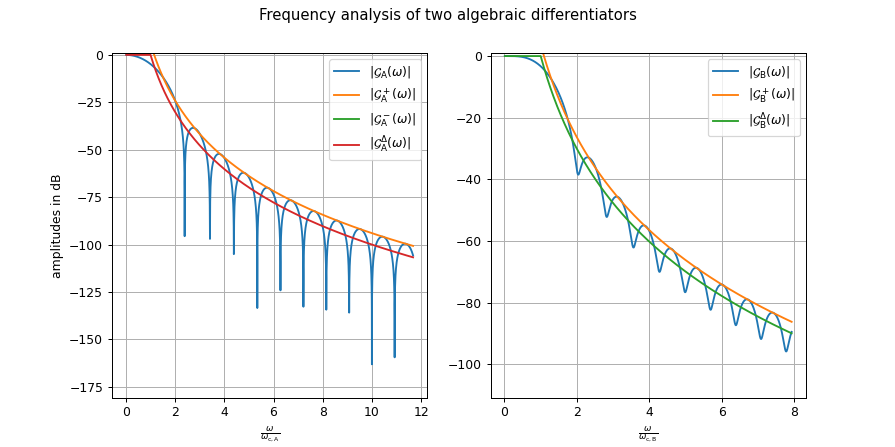

<ipython-input-4-09f842cd3212>:23: RuntimeWarning: divide by zero encountered in log10
  ax[0].plot(omegaH/diffA.get_cutoffFreq(),20*np.log10(lA),label=r"$|\mathcal{G}_{\mathrm{A}}^-(\omega)|$")


In [4]:
omega = np.linspace(1,800,4*10**3)
omegaH = np.linspace(1,800,4*10**3)

# Get phase and amplitude of Fourier transform of filter A
ampA,phaseA = diffA.get_ampAndPhaseFilter(omega)

# Get upper and lower bound for the amplitude of Fourier transform of filter A
uA, lA, mA = diffA.get_asymptotesAmpFilter(omegaH)

# Get phase and amplitude of fourier transform of filter B
ampB,phaseB = diffB.get_ampAndPhaseFilter(omega)

# Get upper and lower bound for the amplitude of Fourier transform of filter B
uB, lB, mB = diffB.get_asymptotesAmpFilter(omegaH)

# Plot results
## PLEASE NOTE: Python will give a warning in the conversion to dB for the differentiato A
## since the amplitude spectrum reaches zero!
fig, ax = plt.subplots(nrows=1, ncols=2,sharex=False, figsize=(10, 5))
fig.suptitle("Frequency analysis of two algebraic differentiators")
ax[0].plot(omega/diffA.get_cutoffFreq(),20*np.log10(ampA),label=r"$|\mathcal{G}_{\mathrm{A}}(\omega)|$")
ax[0].plot(omegaH/diffA.get_cutoffFreq(),20*np.log10(uA),label=r"$|\mathcal{G}_{\mathrm{A}}^+(\omega)|$")
ax[0].plot(omegaH/diffA.get_cutoffFreq(),20*np.log10(lA),label=r"$|\mathcal{G}_{\mathrm{A}}^-(\omega)|$")
ax[0].plot(omegaH/diffA.get_cutoffFreq(),20*np.log10(mA),label=r"$|\mathcal{G}_{\mathrm{A}}^{\Delta}(\omega)|$")
ax[0].set_ylim(top=1)
ax[0].set_xlabel(r"$\frac{\omega}{\omega_{\mathrm{c,A}}}$")
ax[0].set_ylabel(r"amplitudes in dB")
ax[0].legend()
ax[0].grid()

ax[1].plot(omega/diffB.get_cutoffFreq(),20*np.log10(ampB),label=r"$|\mathcal{G}_{\mathrm{B}}(\omega)|$")
ax[1].plot(omegaH/diffB.get_cutoffFreq(),20*np.log10(uB),label=r"$|\mathcal{G}_{\mathrm{B}}^+(\omega)|$")
ax[1].plot(omegaH/diffB.get_cutoffFreq(),20*np.log10(mB),label=r"$|\mathcal{G}_{\mathrm{B}}^{\Delta}(\omega)|$")
ax[1].set_xlabel(r"$\frac{\omega}{\omega_{\mathrm{c,B}}}$")
ax[1].set_ylim(top=1)
ax[1].legend()
plt.grid()
fig.show()

## Numerical differentiation of sample signals
### Simulated signal
The derivative of a signal $y:t\rightarrow y(t)$ without any disturbance is estimated: The first differentiator has a delay. The second differentiator is parametrized for a delay free approximation.

The differentiator has the parameters:
Alpha: 4.000000
Beta: 4.000000
Window length in s: 0.111000
Polynomial degree: 1
Estimation delay in s: 0.000000
Cutoff Frequency: 101.490088
Discrete window length: 111


<IPython.core.display.Javascript object>


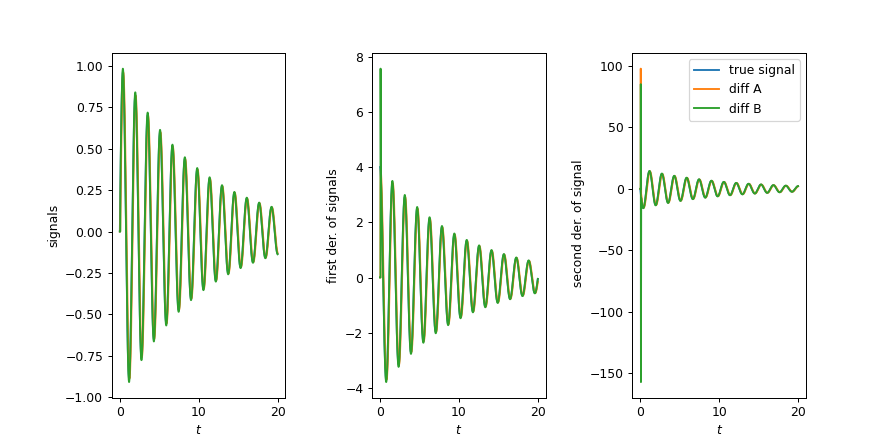

In [5]:
import sympy as sp

#######################################
# Compute signals and its derivatives
#######################################
a = sp.symbols('a_0:3')
t = sp.symbols('t')
y = a[0]*sp.exp(-a[1]*t)*sp.sin(a[2]*t)

# Derivative to be estimated
dy = sp.diff(a[0]*sp.exp(-a[1]*t)*sp.sin(a[2]*t),t,1)
d2y = sp.diff(a[0]*sp.exp(-a[1]*t)*sp.sin(a[2]*t),t,2)
aeval = {'a_0':1,'a_1':0.1,'a_2':4}

# Evaluate signal and true derivative
teval = np.arange(0,20,ts)
for ai in a:
    y = y.subs({ai:aeval[repr(ai)]})
    dy = dy.subs({ai:aeval[repr(ai)]})
    d2y = d2y.subs({ai:aeval[repr(ai)]})
    
yeval = sp.lambdify(t, y, "numpy")
yeval = yeval(teval)
dyeval = sp.lambdify(t, dy, "numpy")
dyeval = dyeval(teval)
d2yeval = sp.lambdify(t, d2y, "numpy")
d2yeval = d2yeval(teval)

#######################################
# Parametrize diffB to be delay-free
#######################################
# Set the parameter \vartheta
diffB.set_theta(1,False)
# Print the characteristics of the differentiator
diffB.printParam()

#######################################
# Estimate derivatives
#######################################
# Filter the signal y
xAppA = diffA.estimateDer(0,yeval)
xAppB = diffB.estimateDer(0,yeval)

# Estimate its first derivative
dxAppA = diffA.estimateDer(1,yeval)
dxAppB = diffB.estimateDer(1,yeval)

# Estimate its 2nd derivative
d2xAppA = diffA.estimateDer(2,yeval)
d2xAppB = diffB.estimateDer(2,yeval)

#######################################
# Plot results
#######################################
fig, (fy,fdy,f2dy) = plt.subplots(nrows=1, ncols=3,sharex=True, figsize=(10, 5))
fig.subplots_adjust( wspace=0.5)
fy.plot(teval,yeval,label='true signal')
fy.plot(teval,xAppA,label='diff A')
fy.plot(teval,xAppB,label='diff B')
fy.set_xlabel(r'$t$')
fy.set_ylabel(r'signals')

fdy.plot(teval,dyeval,label='true signal')
fdy.plot(teval,dxAppA,label='diff A')
fdy.plot(teval,dxAppB,label='diff B')
fdy.set_xlabel(r'$t$')
fdy.set_ylabel(r'first der. of signals')

f2dy.plot(teval,d2yeval,label='true signal')
f2dy.plot(teval,d2xAppA,label='diff A')
f2dy.plot(teval,d2xAppB,label='diff B')
f2dy.set_xlabel(r'$t$')
f2dy.set_ylabel(r' second der. of signal')

plt.legend()

plt.show()

### Estimation of derivative of a measured signal
The measurements are loaded from .dat file. The signal is filtered and the first and second derivatives are estimated using an algebraic differentiator.

The differentiator has the parameters:
Alpha: 4.000000
Beta: 4.000000
Window length in s: 0.270000
Polynomial degree: 0
Estimation delay in s: 0.135000
Cutoff Frequency: 25.383213
Discrete window length: 54


<IPython.core.display.Javascript object>


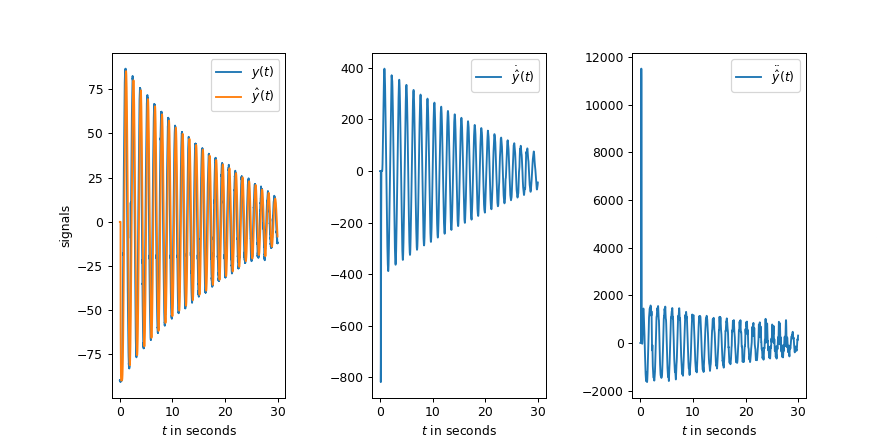

In [6]:
from os.path import dirname, join as pjoin
import scipy.io as sio

# Load measurements
data = np.loadtxt('data90.dat')
tmeas = data[:,0]
ts = tmeas[2]-tmeas[1]
xmeas = data[:,2]

# Estimate derivatives
diffA = AlgebraicDifferentiator(N=0,alpha=4,beta=4,T=None,wc=25, ts=ts,display=True)
xAppA = diffA.estimateDer(0,xmeas)
dxAppA = diffA.estimateDer(1,xmeas)
d2xAppA = diffA.estimateDer(2,xmeas)

# Plot results
fig, (fy,fdy, fd2y) = plt.subplots(nrows=1, ncols=3,sharex=True, figsize=(10, 5))
fig.subplots_adjust( wspace=0.5)
fy.plot(tmeas,xmeas,label='$y(t)$')
fy.plot(tmeas,xAppA,label='$\hat y(t)$')
fy.set_xlabel(r'$t$ in seconds')
fy.set_ylabel(r'signals')
fy.legend()

fdy.plot(tmeas,dxAppA,label='$\dot\hat y(t)$')
fdy.set_xlabel(r'$t$ in seconds')
fdy.legend()

fd2y.plot(tmeas,d2xAppA,label='$\ddot\hat y(t)$')
fd2y.set_xlabel(r'$t$ in seconds')
plt.legend()

plt.show()

# References

[<a id="cit-mboup2007b" href="#call-mboup2007b">1</a>] M. Mboup, C. Join and M. Fliess, ``_A revised look at numerical differentiation with an application to nonlinear feedback control_'', 15th Mediterranean Conf. on Control $\&$ Automation, June 2007.  [online](https://ieeexplore.ieee.org/document/4433728)

[<a id="cit-mboup2009a" href="#call-mboup2009a">2</a>] Mboup M., Join C. and Fliess M., ``_Numerical differentiation with annihilators in noisy environment_'', Numerical Algorithms, vol. 50, number 4, pp. 439--467,  2009.  [online](https://link.springer.com/article/10.1007/s11075-008-9236-1)

[<a id="cit-liu2011a" href="#call-liu2011a">3</a>] Liu D.-Y., Gibaru O. and Perruquetti W., ``_Differentiation by integration with Jacobi polynomials_'', Journal of Computational and Applied Mathematics, vol. 235, number 9, pp. 3015 - 3032,  2011.  [online](http://www.sciencedirect.com/science/article/pii/S0377042710006734)

[<a id="cit-kiltz2017" href="#call-kiltz2017">4</a>] L. Kiltz, ``_Algebraische Ableitungsschätzer in Theorie und Anwendung_'',  2017.  [online](https://scidok.sulb.uni-saarland.de/handle/20.500.11880/26974)

